# Analysing Data for Single Mode ScF3

This tutorial will cover the basics of analysing data obtained in the SingleMode_ScF3 tutorial.

The SAPA refinement stores every refined parameter for each cycle. This is stored in a structured file format called HDF5. The h5py library can be used to interact with the hdf5 file directly, or a sapa_utils_hdf object can be created, which can be interacted with in the same way as an hdf5 file, but also contains some routine plotting functions.

Firstly, we tell the python interpreter where to look for scripts, and then import the sapa_utils_hdf script.

In [ ]:
import sys
sys.path.append('..')

import sapa_utils_hdf as su

C:\workingdirs\sapa_2024\sapa-main\Notebook_Tutorials\ScF3\..\sapa_utils_hdf_wrk.py:143: SyntaxWarning: invalid escape sequence '\]'
  m = re.search("\](.+?)\(",iso_label[i])
C:\workingdirs\sapa_2024\sapa-main\Notebook_Tutorials\ScF3\..\sapa_utils_hdf_wrk.py:352: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel("Weighted Mean Mode Amplitude ($\AA$)")
C:\workingdirs\sapa_2024\sapa-main\Notebook_Tutorials\ScF3\..\sapa_utils_hdf_wrk.py:369: SyntaxWarning: invalid escape sequence '\]'
  m = re.search("\][a-zA-Z0-9]+\([a-z]", iso_label[indices[0]])
C:\workingdirs\sapa_2024\sapa-main\Notebook_Tutorials\ScF3\..\sapa_utils_hdf_wrk.py:450: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel("r ($\AA$)")
C:\workingdirs\sapa_2024\sapa-main\Notebook_Tutorials\ScF3\..\sapa_utils_hdf_wrk.py:451: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel(" D(r) ($\AA^{-2}$)")


We can now create a sapa_utils_hdf object. This takes an isodistort CIF and a sapa hdf5 file as input. 

In [2]:
scf3 = su.sapa_utils_hdf('ScF3_iso.cif', 'ScF3_20_singlemode.hdf5')

Like the sapa object, it imports all information from a CIF. The data is stored in the object;

In [3]:
print(scf3.hdf)

<HDF5 file "ScF3_20_singlemode.hdf5" (mode r)>


The HDF5 file for single mode SAPA is structured such that datasets for each refined parameter are stored at 'irrep/mode/parameter'. To get a list of refined modes for each irrep, use the .hdf['irrep'].keys() method:

In [4]:
print(scf3.hdf['GM4-'].keys())

<KeysViewHDF5 ['mode1', 'mode25', 'mode28']>


In [5]:
# as a list:

print(list(scf3.hdf['GM4-'].keys()))

['mode1', 'mode25', 'mode28']


Similarly, the parameters for each mode:

In [6]:
print(list(scf3.hdf['GM4-/mode1'].keys()))

['F_beq', 'Rwp', 'Sc_beq', 'a1', 'delrwp', 'lprm_a', 'lprm_al', 'lprm_b', 'lprm_be', 'lprm_c', 'lprm_ga', 'phase_scale', 'r2v', 'rv', 'ycalc', 'yobs']


Each of these is an h5py 'dataset' object. If I print the key for a dataset, it will tell me some information about the dataset, but not provide the data:

In [7]:
print(scf3.hdf['GM4-/mode1/Rwp'])

<HDF5 dataset "Rwp": shape (13, 10), type "<f4">


If you recall the previous tutorial, when creating the input file, we specified 10 cycles. We also provided 13 temperatures to the execute function. This gives us the dimension of the dataset. To look at the data, we use array slicing syntax from numpy:

In [8]:
print(scf3.hdf['GM4-/mode1/Rwp'][:,:]) # entire dataset

print(scf3.hdf['GM4-/mode1/Rwp'][0,:]) # one temperature

[[21.15895 21.15963 21.16696 21.16707 21.16726 21.16925 21.17173 21.17326
  21.1743  21.18103]
 [21.29864 21.29955 21.30224 21.30367 21.30531 21.30688 21.30807 21.30907
  21.31564 21.3176 ]
 [21.36822 21.37039 21.3853  21.38555 21.38558 21.38578 21.39177 21.41399
  21.42856 21.47506]
 [21.70775 21.72463 21.72468 21.7247  21.72492 21.75088 21.75456 21.75584
  21.76424 21.83077]
 [22.38188 22.38539 22.38616 22.39029 22.39087 22.39103 22.3928  22.39563
  22.39863 22.4491 ]
 [22.97231 22.97457 22.9768  22.98511 22.98512 22.99441 23.03092 23.03462
  23.03564 23.04463]
 [23.71946 23.7266  23.76095 23.76152 23.7873  23.78911 23.78927 23.78932
  23.78935 23.78949]
 [24.19117 24.20126 24.21357 24.21716 24.21866 24.2187  24.21946 24.21959
  24.29018 24.38355]
 [24.85316 24.85585 24.85653 24.87187 24.87255 24.87297 24.8788  24.93421
  24.93464 24.93586]
 [25.93206 25.93573 25.93846 25.94518 25.97293 26.02535 26.02586 26.02588
  26.06146 26.0615 ]
 [26.63686 26.64417 26.65767 26.67492 26.67577 26.

We can see within each temperature, the Rwp is increasing as we go down the 'row' in the dataset. This is because the refinements are ordered by Rwp before they are stored. We can therefore look at the best refinement at each temperature:

In [9]:
print(scf3.hdf['GM4-/mode1/Rwp'][:,0])

[21.15895 21.29864 21.36822 21.70775 22.38188 22.97231 23.71946 24.19117
 24.85316 25.93206 26.63686 27.09051 27.13224]


There is one 'derived' parameter in the list of keys; delrwp. This is the change in Rwp when the mode is active vs when no modes are active. As with Rwp, the lower the value is (these values are almost always negative), the better the fit. The below is corresponding delrwp for GM4- mode1:

In [10]:
print(scf3.hdf['GM4-/mode1/delrwp'][:,0])

[-0.00518 -0.07972 -0.12962 -0.132   -0.30959 -0.65574 -1.01272 -1.41624
 -1.84188 -2.59719 -2.93337 -3.24974 -3.66861]


We now move on to plotting functions. The most basic of these is the 'plot' function, which takes a list of keys as arguments. By default, it plots the value of that key for the best refinement at each temperature, although the index can be increased using the optional 'index' argument (i.e for the second best refinement, use index = 1). Below, I plot the delrwp for each mode for GM4-:

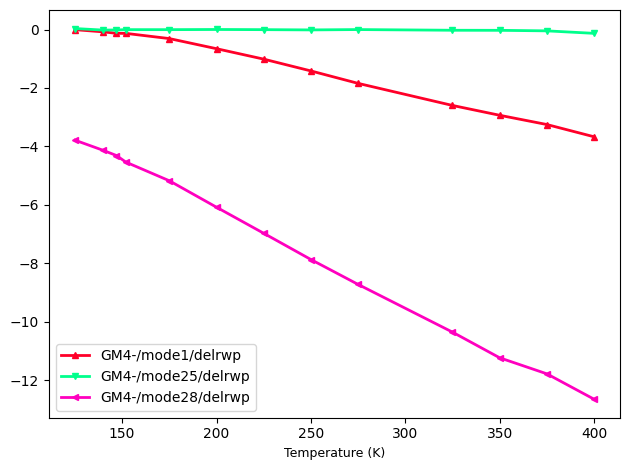

In [11]:
scf3.plot(['GM4-/mode1/delrwp', 'GM4-/mode25/delrwp', 'GM4-/mode28/delrwp'])

This could also be plotted using a for loop, which could save time if you were not using the unique_modes parameter (the number of modes would triple to 9)

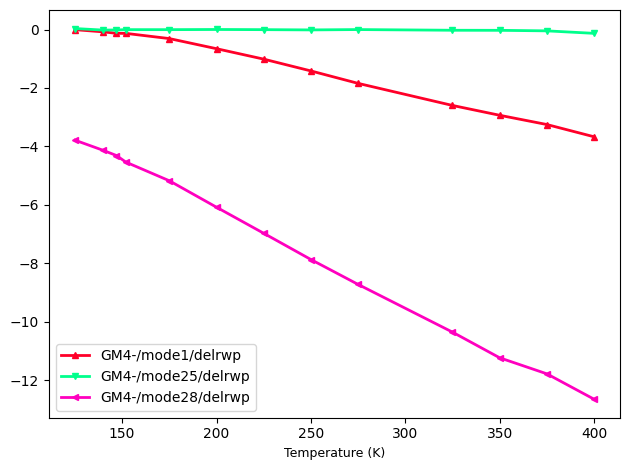

In [12]:
modes = list(scf3.hdf['GM4-'].keys())
plot_list = []
for mode in modes:
    plot_list.append(f'GM4-/{mode}/delrwp')
scf3.plot(plot_list)

We can plot all delrwps with a different function;

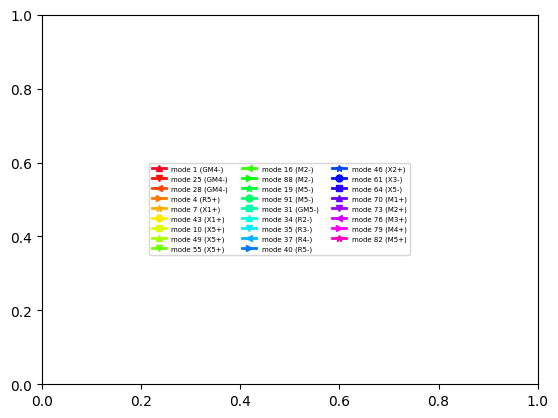

In [13]:
scf3.plot_singlemode()

The figure here gets saved to the working directory. The legend gets saved separately as it is quite large.

We can use plot function to take a closer look at some modes:

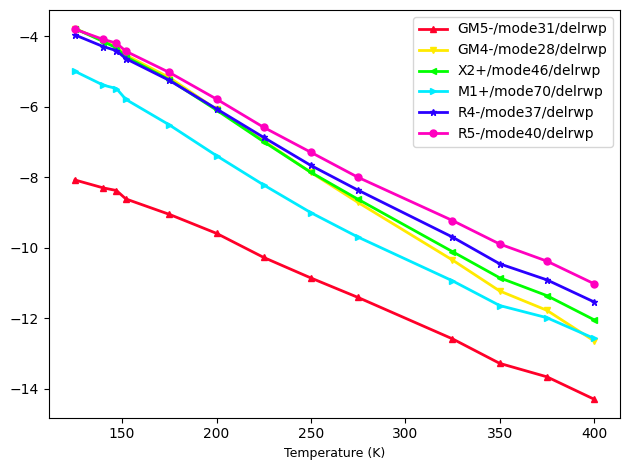

In [14]:
scf3.plot(['GM5-/mode31/delrwp', 'GM4-/mode28/delrwp', 'X2+/mode46/delrwp', 'M1+/mode70/delrwp', 'R4-/mode37/delrwp', 
           'R5-/mode40/delrwp'])#, 'X1+/mode43/delrwp', 'X5+/mode55/delrwp', 'X5-/mode64/delrwp', 'M5+/mode82/delrwp'])

Since the single mode version of SAPA is comparitively quick to operate, it is easier to see changes e.g. with respect to refinement radius. Using the previous tutorial, re-run with different finishx values (and change sample to something to denote the new finish_x value. e.g. ScF3_20 for finishx = 20). For simplicitys sake, change these in the write_inp() function, then choose Kernel -> Restart and Run-All. The below code plots the same modes as above for finishx = 20

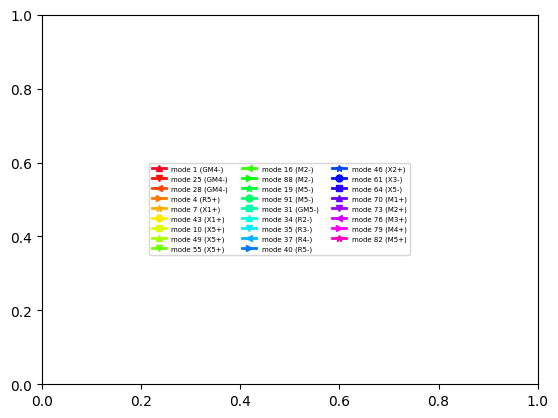

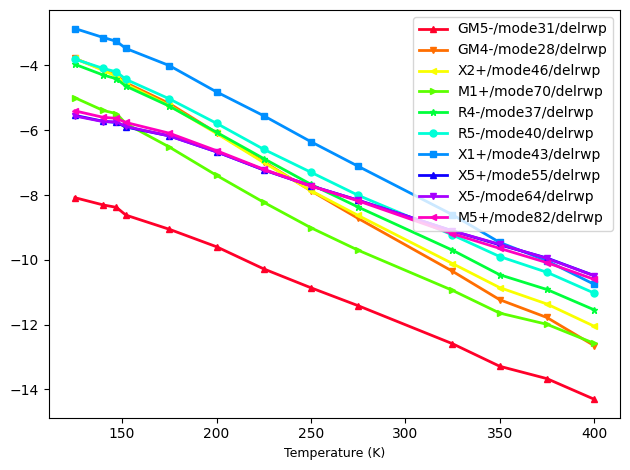

In [15]:
new_sample = 'ScF3_20'
scf3_new = su.sapa_utils_hdf('ScF3_iso.cif', f'{new_sample}_singlemode.hdf5')
scf3_new.plot_singlemode()
scf3_new.plot(['GM5-/mode31/delrwp', 'GM4-/mode28/delrwp', 'X2+/mode46/delrwp', 'M1+/mode70/delrwp', 'R4-/mode37/delrwp', 
           'R5-/mode40/delrwp', 'X1+/mode43/delrwp', 'X5+/mode55/delrwp', 'X5-/mode64/delrwp', 'M5+/mode82/delrwp'])


Can you find anything that is shared in the characters of the best fitting modes?

Why might these modes best describe local structural deviation from the average structure?

If you investigate these modes using ISOVIZ, you will find that most of them are a "semi-rigid" type mode - they distort bond angles in the ScF6 octahedra, but not bond lengths. A lot of these modes look very similar, but with different propogation vectors -> this indicates they are the same mode but at different k-points, i.e they are on the same line in the dispersion curve.

R5- is a rigid unit mode, with each of the 3 modes associated with the irrep being an out-of-phase octahedral tilt. This mode has a large negative Gruneisen parameter and is low in energy, so is commonly thought of as the driving force of the negative thermal expansion property of ScF3. The overall thermal expansion coefficient is formed from a contribution of all modes, weighted with inverse proportionality to their energy. R5-, and the other rigid unit modes, only exist on one line, so their contribution is typically drowned out by the positive gruneisen parameters of other modes, hence why typically the standard ABX3 perovskites do not exhibit NTE.

These semi-rigid unit modes have small negative Gruneisen parameters, and in ScF3 are low enough in energy that they bring the sign of thermal expansion negative. This can happen in ScF3 because the lack of an A-site compared to ABO3 perovskites, and the 1- charge of F compared to the typical 2- charge on the O, means the coulomb repulsion force between F ions bonded to the same Sc is lowered.  